# Assignment 1: Genome Assembly

## Question 1. Coverage Analysis

Question 1a. How long is the reference genome?

Command(s):
samtools faidx ref.fa
less -S asm/ref.fa.fai

Output:
Halomonas       233806  11      70      71

Genome size: 233806

Question 1b. How many reads are provided and how long are they? Make sure to measure each file separately

Command(s):
FastQC frag180.1.fq
FastQC frag180.2.fq 
FastQC jump2k.2.fq 
FastQC jump2k.1.fq

Opened HTML files

frag180
-reads: 35178
-length: 100

jump2k
-reads: 70355
-length: 50

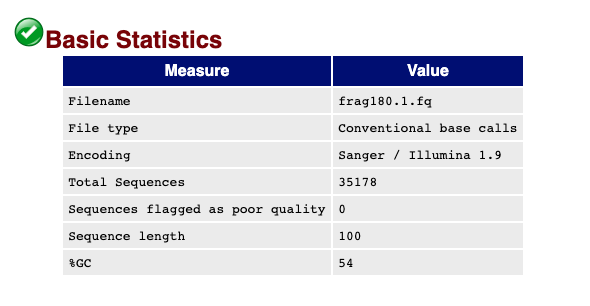

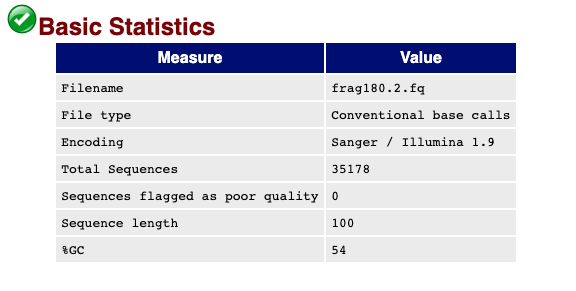

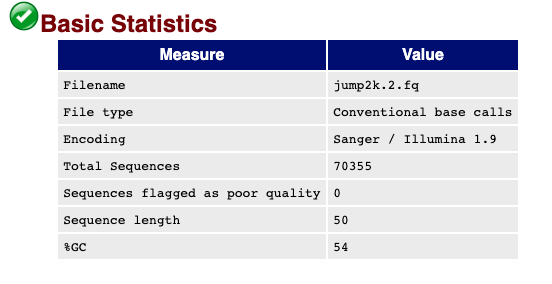

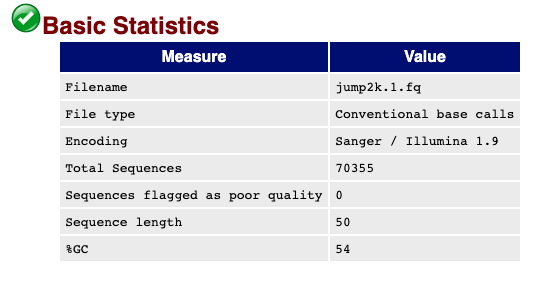

Question 1c. How much coverage do you expect to have?

coverage = total_bases_sequenced / genome_size

coverage = [35178(100) + 70355(50) ] / 233806

coverage = 30.09

Question 1d. Plot the average quality value across the length of the reads

frag180.1.fq

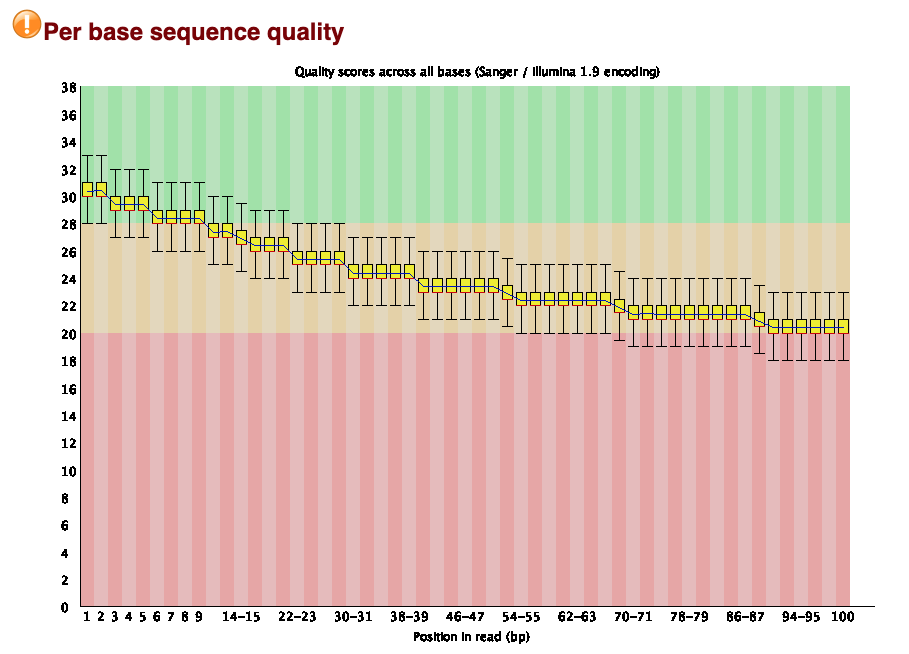

frag180.2.fq

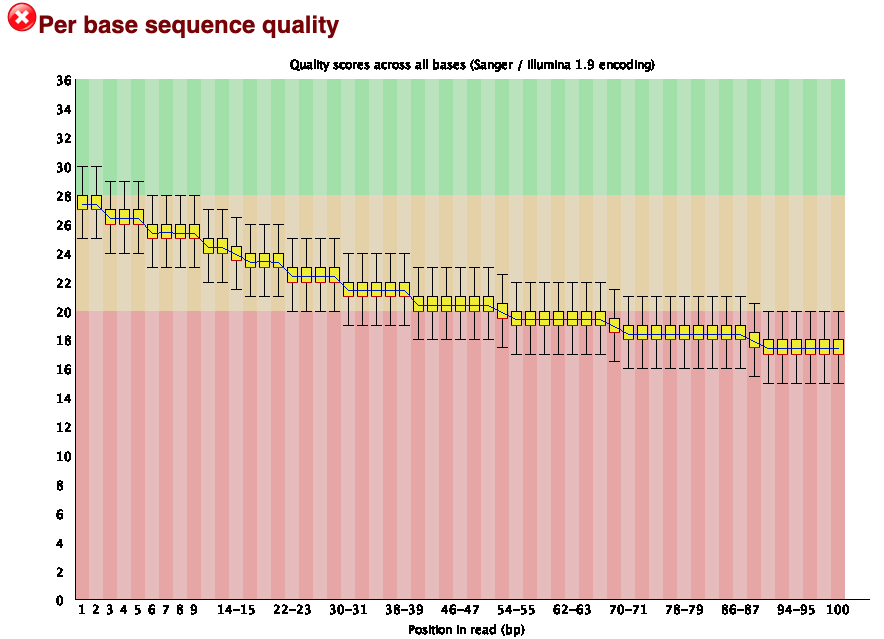

jump2k.1.fq

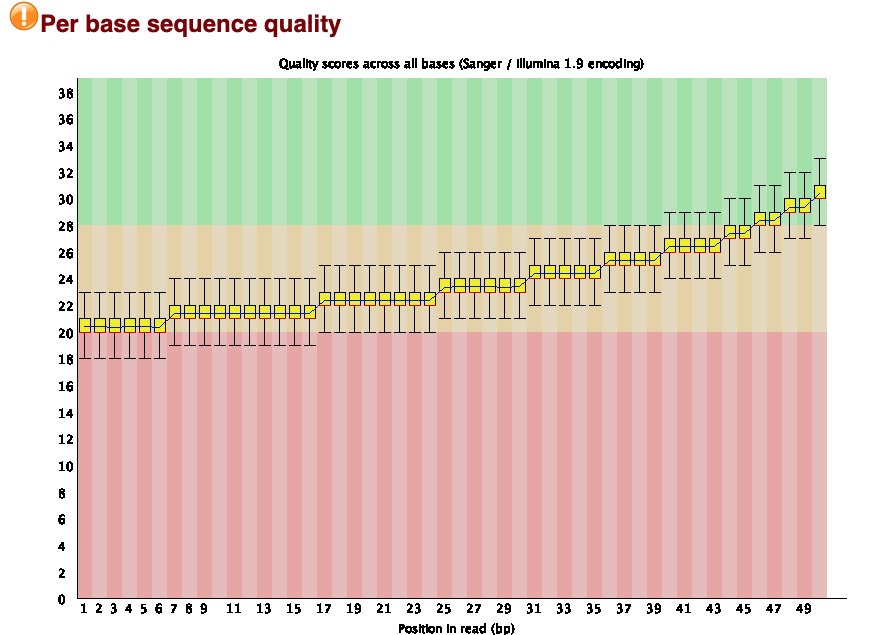

jump2k.2.fq

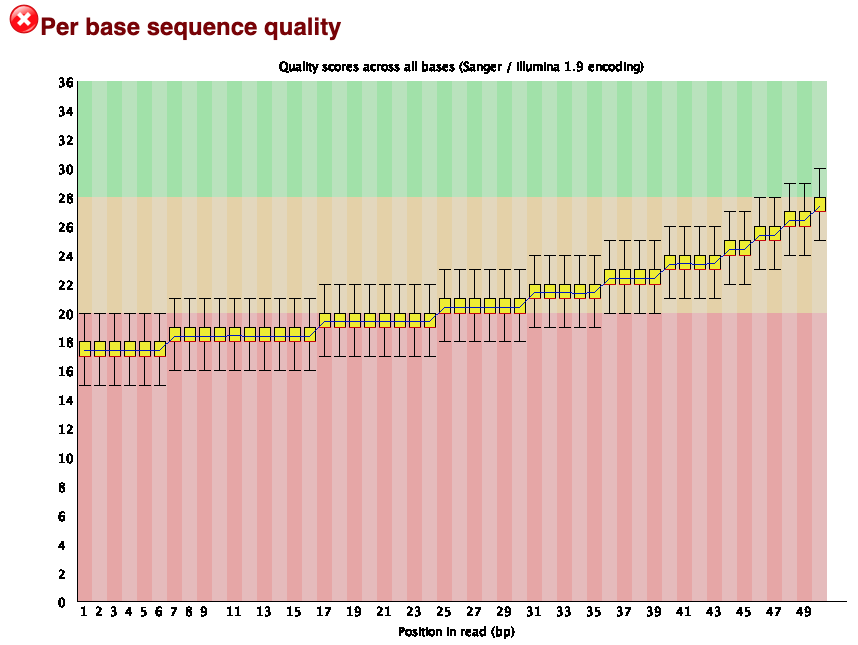

## Question 2. Kmer Analysis

Question 2a. How many kmers occur exactly 50 times?

Commands:
jellyfish count -m 21 -C -s 1000000 ~/qbb2020-answers/Week_1/asm/*.fq
jellyfish histo mer_counts.jf > reads.histo
cat reads.histo

1091 kmers occur 50 times.

Question 2b. What are the top 10 most frequently occurring kmers

Commands:
jellyfish dump  mer_counts.jf > mer_dump_counts.jf
cat mer_dump_counts.jf | sort -k 2 -nr | head -10

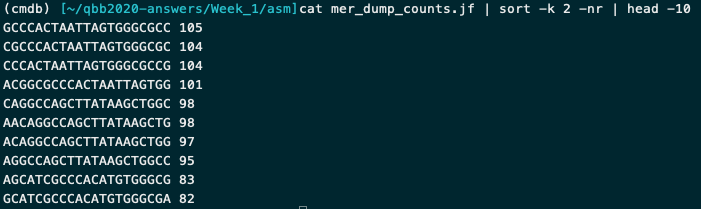

Question 2c. What is the estimated genome size based on the kmer frequencies? 

233,468bp

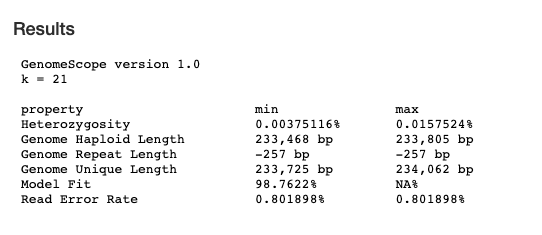

Question 2d. How well does the GenomeScope genome size estimate compare to the reference genome?

GenomeScope estimated the reference genome well. The min and max arre within a ~400bp range and the max value is almost exactly what actual size of the genome.

## Question 3. De novo assembly

Question 3a. How many contigs were produced? 

Commands:
spades.py --pe1-1 frag180.1.fq --pe1-2 frag180.2.fq --mp1-1 jump2k.1.fq --mp1-2 jump2k.2.fq -o asm -t 4 -k 31

grep -c '>' contigs.fasta

Output:
4

There were 4 contigs produced.

Question 3b. What is the total length of the contigs?

Commands:
samtools faidx contigs.fasta
cat contigs.fasta.fai

Added them together.
Total length of contigs: 234467

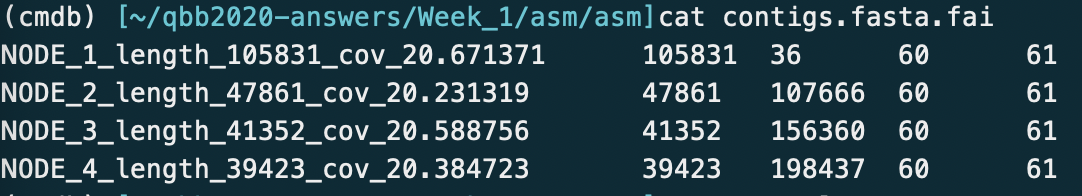

Question 3c. What is the size of your largest contig?

NODE_1_length_105831_cov_20.671371:  105831

Question 3d. What is the contig N50 size? 

half the total length falls within the second longest contig
NODE_2_length_47861_cov_20.231319: 47861

## Question 4. Whole Genome Alignment

Question 4a. What is the average identify of your assembly compared to the reference? 

Commands:
dnadiff ~/qbb2020-answers/Week_1/asm/ref.fa ~/qbb2020-answers/Week_1/asm/asm/scaffolds.fasta
cat out.report

Both are 99.98

Question 4b. What is the length of the longest alignment

Commands:
nucmer ~/qbb2020-answers/Week_1/asm/ref.fa ~/qbb2020-answers/Week_1/asm/asm/scaffolds.fasta
show-coords out.delta

Longest alignment: 207006(reference), 206998(assembly)

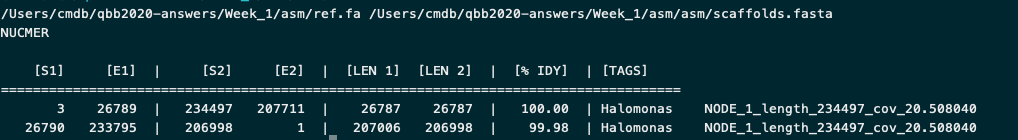

Question 4c. How many insertions and deletions are in the assembly? 

Insertions: 1
Deletions: 2

## Question 5. Decoding the insertion

Question 5a. What is the position of the insertion in your assembly? Provide the corresponding position in the reference.

Position in assembly: 206999 - 207710
Position in reference: (between) 26789 - 26790

Question 5b. How long is the novel insertion? 

207710 - 206999 = 111
Insert length: 111

Question 5c. What is the DNA sequence of the encoded message? 

Command:

samtools faidx ~/qbb2020-answers/Week_1/asm/asm/scaffolds.fasta NODE_1_length_234497_cov_20.508040:206999-207710 > insert_sequence.fasta

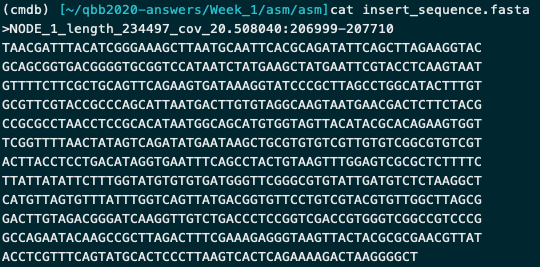

Question 5d. What is the secret message? 

Commands:

python ported_decoder.py --decode --rev_comp --input ~/qbb2020-answers/Week_1/asm/asm/insert_sequence.fasta > decoded_message.fasta

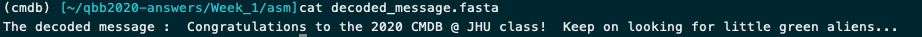